# Second Fundamental Theorem of Calculus

In [1]:
from pathlib import Path
import numpy as np
import scipy
from scipy.integrate import quad, romberg

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

import seaborn as sns

sns.set_theme()
mpl.rc(
    "figure",
    dpi=150,
    # Use tight layout
    autolayout=True,
)
mpl.rc("text", usetex=True)
mpl.rc("font", family="Helvetica")


FIGURES_DIR = Path("../../tex/figures")

Bad value in file PosixPath('/Users/isaac/.matplotlib/stylelib/math.mplstyle'), line 14 ('axes.facecolor : #EAEAF2'): Key axes.facecolor: '' does not look like a color arg


numerical: (0.841605179289723, 0.0013336664943832525)
analytical: 0.8414709848078965


/var/folders/ys/b1hv6dln0t38g92zzgh9xgsw0000gn/T/ipykernel_10213/1437321396.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print(f"numerical: {quad(f, 0, 1)}")


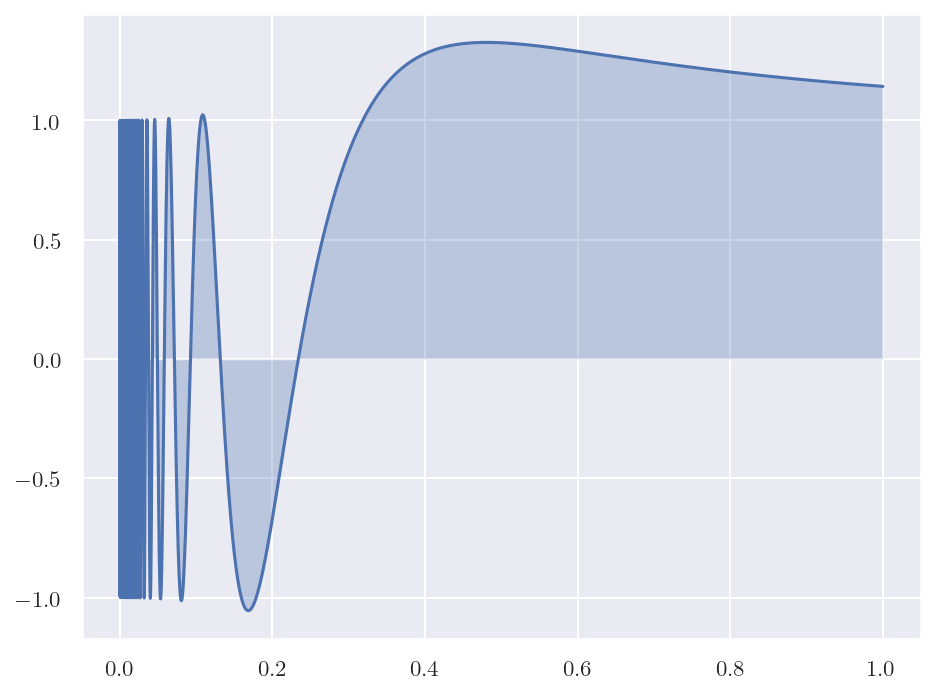

In [37]:
f = lambda x: 2 * x * np.sin(1 / x) - np.cos(1 / x)

print(f"numerical: {quad(f, 0, 1)}")
print(f"analytical: {np.sin(1)}")

x = np.linspace(1e-5, 1, 100000)
y = f(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y)
ax.fill_between(x, 0, y, alpha=0.3)

plt.show()

/var/folders/ys/b1hv6dln0t38g92zzgh9xgsw0000gn/T/ipykernel_10389/2642369710.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print(f"numerical: {quad(f, 0, 1)}")


numerical: (0.841605179289723, 0.0013336664943832525)
analytical: 0.8414709848078965


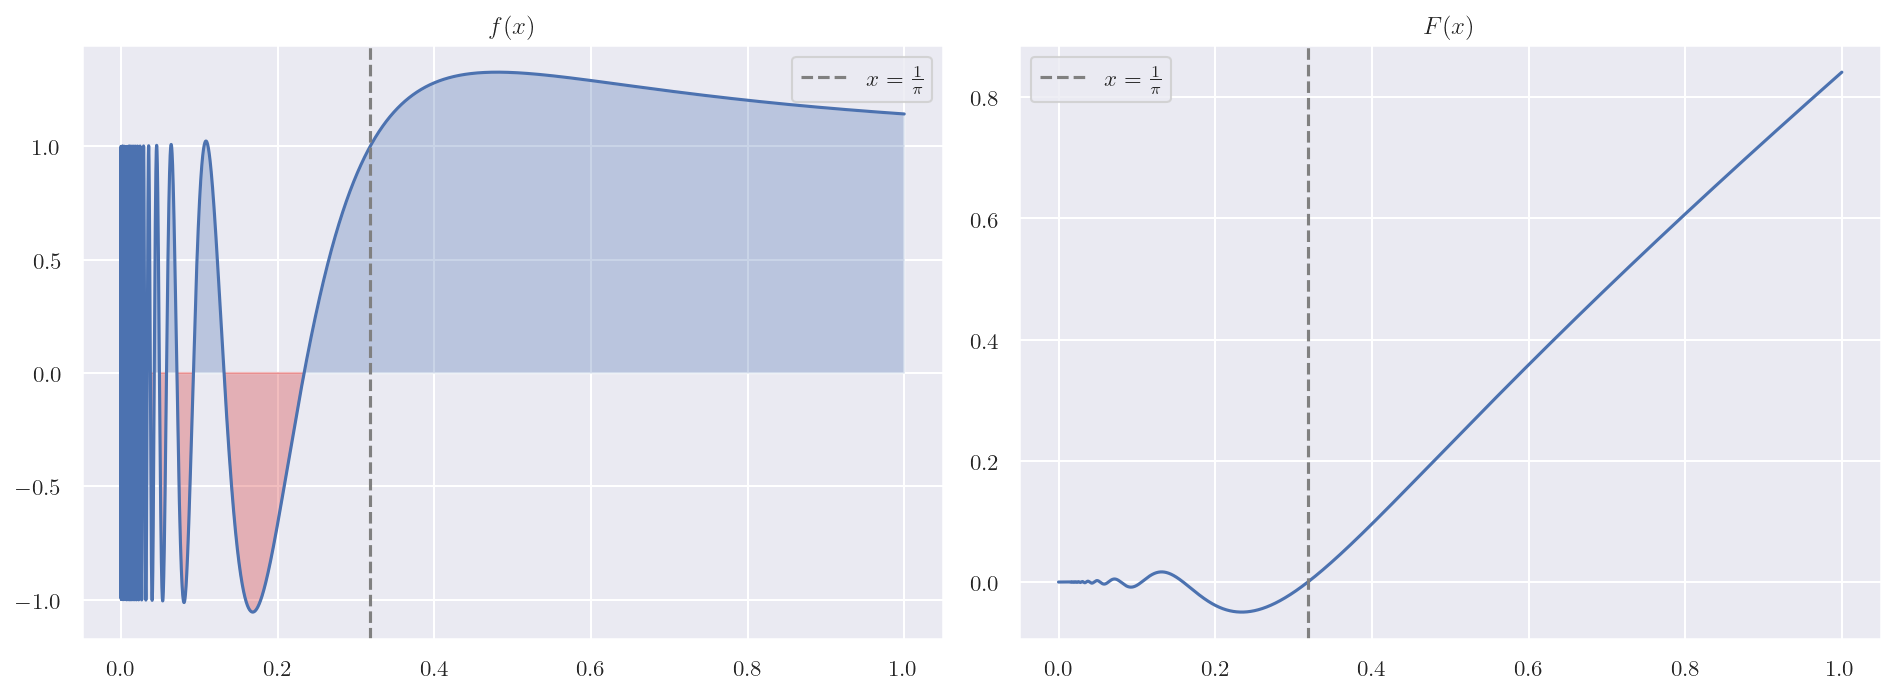

In [2]:
F = lambda x: x**2 * np.sin(1 / x)
f = lambda x: 2 * x * np.sin(1 / x) - np.cos(1 / x)

print(f"numerical: {quad(f, 0, 1)}")
print(f"analytical: {np.sin(1)}")

x = np.linspace(1e-5, 1, 100000)

zeros = np.array([1 / (k * np.pi) for k in range(1, 10)])
zero = zeros[0]

ax1: Axes
ax2: Axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4.8))

y = f(x)
ax1.plot(x, y)
ax1.fill_between(x, 0, np.clip(y, 0, np.abs(y)), alpha=0.3)
ax1.fill_between(x, y, 0, where=y < 0, alpha=0.3, color="tab:red")
ax1.axvline(
    zero,
    linestyle="--",
    color="gray",
    label=r"$x = \frac{1}{\pi}$",
)
ax1.set_title(r"$f(x)$")
ax1.legend()

y = F(x)
ax2.plot(x, y)
ax2.axvline(
    zero,
    linestyle="--",
    color="gray",
    label=r"$x = \frac{1}{\pi}$",
)
ax2.set_title(r"$F(x)$")
ax2.legend()

plt.show()

fig.savefig(FIGURES_DIR / "second-fundamental-theorem-of-calculus-example-1.png")